### 5C NETWORK ASSESSMENT

### Sales data 1

### 2 Marks

In [46]:
# Question 1

import pandas as pd
data = pd.read_csv('sales_data_1.csv')  
data['COGS'] = data['Buying price'] * data['Quantity sold']
data['Revenue'] = data['Selling price'] * data['Quantity sold']
total_cogs = data['COGS'].sum()
total_revenue = data['Revenue'].sum()
gross_margin = (total_revenue - total_cogs) / total_revenue
gross_margin_percentage = gross_margin * 100
print(f"The overall gross margin is: {gross_margin_percentage:.2f}%")


The overall gross margin is: 24.63%


In [47]:
# Question 2

vendor_gross_profit = df.groupby('Firm bought from')['Selling price', 'Buying price'].agg(sum)
vendor_gross_profit['gross_profit'] = vendor_gross_profit['Selling price'] - vendor_gross_profit['Buying price']

most_profitable_vendor = vendor_gross_profit['gross_profit'].idxmax()
# Print the results
print('Most profitable vendor:', most_profitable_vendor)


Most profitable vendor: Vendor7


<ipython-input-47-761d6c7e3c90>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendor_gross_profit = df.groupby('Firm bought from')['Selling price', 'Buying price'].agg(sum)


In [48]:
# Question 3

data['Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

customer_profit = data.groupby('Customer')['Profit'].sum().reset_index()

least_profitable_customer = customer_profit.sort_values(by='Profit').iloc[0]

print(f"The least profitable customer is {least_profitable_customer['Customer']}")

The least profitable customer is Customer3


In [49]:
# Question 4

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

data['Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

data['Day of Week'] = data['Date'].dt.day_name()

day_of_week_profit = data.groupby('Day of Week')['Profit'].sum().reset_index()

most_profitable_day = day_of_week_profit.sort_values(by='Profit', ascending=False).iloc[0]

print(f"The most profitable day of the week is {most_profitable_day['Day of Week']}")

The most profitable day of the week is Monday


In [50]:
# Question 5

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

data['Day of Week'] = data['Date'].dt.day_name()

day_of_week_profit = data.groupby('Day of Week')['Profit'].sum().reset_index()

least_profitable_day = day_of_week_profit.sort_values(by='Profit').iloc[0]

print(f"The least profitable day of the week is {least_profitable_day['Day of Week']}")


The least profitable day of the week is Sunday


### Sales Data 2

In [53]:
# Question 6

data = pd.read_csv('sales_data_2.csv')
data['Daily Gross Profit'] = data['Quantity sold'] * (data['Selling price'] - data['Buying price'])

data['3-Day Rolling Average'] = data['Daily Gross Profit'].rolling(window=3).mean()

print(data[['Date', 'Daily Gross Profit', '3-Day Rolling Average']])

          Date  Daily Gross Profit  3-Day Rolling Average
0   2023-08-21              856.68                    NaN
1   2023-08-21              146.71                    NaN
2   2023-08-21              297.45             433.613333
3   2023-08-21               87.64             177.266667
4   2023-08-21               42.01             142.366667
..         ...                 ...                    ...
65  2023-08-27              407.34             552.863333
66  2023-08-27               84.00             552.070000
67  2023-08-27              947.84             479.726667
68  2023-08-27              126.44             386.093333
69  2023-08-27               25.88             366.720000

[70 rows x 3 columns]


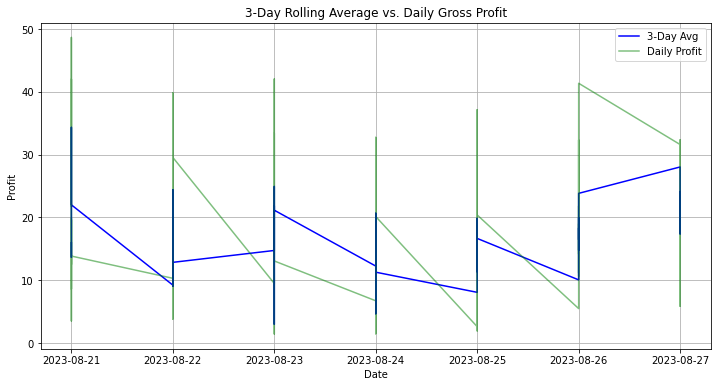

In [67]:
# Question 7

data = data.sort_values(by='Date')

data['Daily Gross Profit'] = data['Selling price'] - data['Buying price']

data['3-Day Rolling Average'] = data['Daily Gross Profit'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['3-Day Rolling Average'], label='3-Day Avg', color='blue')
plt.plot(data['Date'], data['Daily Gross Profit'], label='Daily Profit', color='green', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('3-Day Rolling Average vs. Daily Gross Profit')
plt.legend()
plt.grid(True)

plt.show()

In [81]:
# Question 8

# a. Would you fire any vendor?
df = pd.read_csv('sales_data_2.csv', parse_dates=['Date'])

df['GrossProfit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
vendor_avg_margin = df.groupby('Firm bought from')['GrossProfit'].mean()
vendors_to_fire = vendor_avg_margin[vendor_avg_margin < vendor_avg_margin.median()].index
print("Vendors to fire:", vendors_to_fire)

# b. Would you let go of any customer?
customer_avg_margin = df.groupby('Customer')['GrossProfit'].mean()
customers_to_let_go = customer_avg_margin[customer_avg_margin < customer_avg_margin.median()].index
print("Customers to let go:", customers_to_let_go)

Vendors to fire: Index(['Vendor1', 'Vendor2', 'Vendor5', 'Vendor7', 'Vendor8'], dtype='object', name='Firm bought from')
Customers to let go: Index(['Customer3', 'Customer5', 'Customer6', 'Customer7', 'Customer9'], dtype='object', name='Customer')


In [82]:
# Question 9

data = pd.read_csv('sales_data_2.csv')

buying_price_percentiles = np.percentile(data['Buying price'], [25, 50, 75])

selling_price_percentiles = np.percentile(data['Selling price'], [25, 50, 75])

print("Buying Price Percentiles (25th, Median, 75th):", buying_price_percentiles)
print("Selling Price Percentiles (25th, Median, 75th):", selling_price_percentiles)


Buying Price Percentiles (25th, Median, 75th): [29.9  60.76 78.32]
Selling Price Percentiles (25th, Median, 75th): [ 38.975   78.99   103.3975]


In [84]:
# Question 10

df = pd.read_csv('sales_data_2.csv')

q25 = df['Buying price'].quantile(0.25)
q75 = df['Buying price'].quantile(0.75)

low_price_transactions = df[df['Buying price'] < q25]
high_price_transactions = df[df['Buying price'] > q75]

low_price_transaction_percentage = len(low_price_transactions) / len(df) * 100
high_price_transaction_percentage = len(high_price_transactions) / len(df) * 100

print('Percentage of transactions where the buying price is below the 25th percentile:', low_price_transaction_percentage)
print('Percentage of transactions where the buying price is above the 75th percentile:', high_price_transaction_percentage)


Percentage of transactions where the buying price is below the 25th percentile: 25.71428571428571
Percentage of transactions where the buying price is above the 75th percentile: 25.71428571428571


In [91]:
# Question 11


original_gross_margin = (data['Selling price'] - data['Buying price']).sum()

data_without_vendor4 = data[data['Firm bought from'] != 'Vendor4']
gross_margin_with_vendor4 = (data_without_vendor4['Selling price'] - data_without_vendor4['Buying price']).sum()

impact_on_gross_margin = original_gross_margin - gross_margin_with_vendor4

print("Original Gross Margin:", original_gross_margin)
print("Gross Margin with Vendor 4 Included:", gross_margin_with_vendor4)
print("Impact on Gross Margin by Honoring Vendor 4:", impact_on_gross_margin)


Original Gross Margin: 1207.1999999999998
Gross Margin with Vendor 4 Included: 1037.09
Impact on Gross Margin by Honoring Vendor 4: 170.1099999999999


In [92]:
# Question 12
data = pd.read_csv('sales_data_2.csv')

vendor_gross_margin = data.groupby('Firm bought from').apply(lambda x: (x['Selling price'] - x['Buying price']).sum())

best_vendor = vendor_gross_margin.idxmax()
highest_gross_margin = vendor_gross_margin.max()
theoretical_max_gross_margin = (data[data['Firm bought from'] == best_vendor]['Selling price'] - data[data['Firm bought from'] == best_vendor]['Buying price']).sum()

print("Vendor with Highest Gross Margin:", best_vendor)
print("Total Gross Margin with Best Vendor:", highest_gross_margin)
print("Theoretical Maximum Gross Margin with Exclusive Sourcing from Best Vendor:", theoretical_max_gross_margin)


Vendor with Highest Gross Margin: Vendor7
Total Gross Margin with Best Vendor: 224.98
Theoretical Maximum Gross Margin with Exclusive Sourcing from Best Vendor: 224.98


In [93]:
# Question 13

branch_data = data[data['Firm bought from'] == 'Vendor4']

initial_quantity = branch_data['Quantity sold']
initial_price = branch_data['Selling price']

new_price_increase = initial_price + 1
new_quantity_increase = branch_data['Quantity sold']

new_price_decrease = initial_price - 1
new_quantity_decrease = branch_data['Quantity sold']

percent_change_quantity_increase = ((new_quantity_increase - initial_quantity) / initial_quantity) * 100
percent_change_price_increase = ((new_price_increase - initial_price) / initial_price) * 100

percent_change_quantity_decrease = ((new_quantity_decrease - initial_quantity) / initial_quantity) * 100
percent_change_price_decrease = ((new_price_decrease - initial_price) / initial_price) * 100

price_elasticity_increase = (percent_change_quantity_increase / percent_change_price_increase)
price_elasticity_decrease = (percent_change_quantity_decrease / percent_change_price_decrease)

print("Price Elasticity when price increases by Rs. 1:", price_elasticity_increase)
print("Price Elasticity when price decreases by Rs. 1:", price_elasticity_decrease)


Price Elasticity when price increases by Rs. 1: 1     0.0
29    0.0
34    0.0
49    0.0
54    0.0
59    0.0
62    0.0
63    0.0
65    0.0
dtype: float64
Price Elasticity when price decreases by Rs. 1: 1    -0.0
29   -0.0
34   -0.0
49   -0.0
54   -0.0
59   -0.0
62   -0.0
63   -0.0
65   -0.0
dtype: float64
